In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [37]:
df = pd.read_csv(r"C:\Users\soura\OneDrive - The University of Texas at Dallas\Documents\Career\Side Projects\Datasets\historical_data.csv")

In [38]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
0,1.0,2/6/2015 22:24,2/6/2015 23:27,1845,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0,446,861.0
1,2.0,2/10/2015 21:49,2/10/2015 22:56,5477,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,446,690.0
2,3.0,1/22/2015 20:39,1/22/2015 21:09,5477,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,446,690.0
3,3.0,2/3/2015 21:21,2/3/2015 22:13,5477,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0,446,289.0
4,3.0,2/15/2015 2:40,2/15/2015 3:20,5477,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,446,650.0


In [39]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,196441.000000,197428.000000,196433.000000,197428.000000,197428.000000,197428.000000,197428.000000,197428.000000,181166.000000,181166.000000,181166.000000,197428.000000,196902.000000
mean,2.978706,3530.510272,2.882352,3.196391,2682.331402,2.670791,686.218470,1159.588630,44.808093,41.739747,58.050065,308.560179,545.358935
std,1.524867,2053.496711,1.503771,2.666546,1823.093688,1.630255,522.038648,558.411377,34.526783,32.145733,52.661830,90.139653,219.352902
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,-86.000000,0.000000,-4.000000,-5.000000,-6.000000,0.000000,0.000000
25%,2.000000,1686.000000,1.000000,2.000000,1400.000000,1.000000,299.000000,800.000000,17.000000,15.000000,17.000000,251.000000,382.000000
50%,3.000000,3592.000000,3.000000,3.000000,2200.000000,2.000000,595.000000,1095.000000,37.000000,34.000000,41.000000,251.000000,544.000000
75%,4.000000,5299.000000,4.000000,4.000000,3395.000000,3.000000,949.000000,1395.000000,65.000000,62.000000,85.000000,446.000000,702.000000
max,6.000000,6987.000000,7.000000,411.000000,27100.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [40]:
df.shape

(197428, 16)

In [41]:
#DATA CLEANING

#Remove invalid records
df = df.dropna()

In [42]:
df.shape

(175777, 16)

In [43]:
cols = ['min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'subtotal', 'estimated_order_place_duration', 'estimated_store_to_consumer_driving_duration']
df = df[(df[cols] > 0).all(axis=1)]

In [44]:
df.shape

(169007, 16)

In [45]:
df.describe()

,market_id,store_id,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration
count,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000
mean,2.767045,3558.945736,2.911004,3.121362,2709.615010,2.651772,695.318691,1166.638536,46.136172,43.001248,59.835238,307.531262,547.057802
std,1.328573,2057.379478,1.512099,2.228914,1826.800555,1.607249,517.776315,556.640140,34.258630,31.884539,52.613187,89.407100,218.510279
min,1.000000,1.000000,1.000000,1.000000,109.000000,1.000000,1.000000,60.000000,1.000000,1.000000,1.000000,10.000000,1.000000
25%,2.000000,1701.000000,1.000000,2.000000,1427.000000,1.000000,300.000000,800.000000,18.000000,16.000000,19.000000,251.000000,385.000000
50%,2.000000,3620.000000,3.000000,3.000000,2245.000000,2.000000,599.000000,1095.000000,38.000000,36.000000,43.000000,251.000000,545.000000
75%,4.000000,5341.000000,4.000000,4.000000,3435.000000,3.000000,950.000000,1399.000000,67.000000,63.000000,87.000000,446.000000,704.000000
max,6.000000,6987.000000,7.000000,48.000000,26800.000000,20.000000,14700.000000,14700.000000,171.000000,154.000000,285.000000,2715.000000,2088.000000


In [46]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

df['created_at'] = df['created_at'].astype(int) // 10 ** 9
df['actual_delivery_time'] = df['actual_delivery_time'].astype(int) // 10 ** 9

In [47]:
#FEATURE ENGINEERING

#Feature 1 - Delivery Duration
df['delivery_duration'] = df['actual_delivery_time'] - df['created_at']

#Feature 2 - Busy Dashers Ratio
df['busy_dashers_ratio'] = df['total_busy_dashers'] / df['total_onshift_dashers']

#Feature 3 - Item Price Range
df['item_price_range'] = df['max_item_price'] - df['min_item_price']

#Feature 4 - Avg. Item Price
df['avg_item_price'] = df['subtotal']/df['total_items']

#Feature 5 - Non-prep duration
df['non_prep_duration'] = df['estimated_order_place_duration'] + df['estimated_store_to_consumer_driving_duration']


In [48]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,...,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_order_place_duration,estimated_store_to_consumer_driving_duration,delivery_duration,busy_dashers_ratio,item_price_range,avg_item_price,non_prep_duration
0,1.0,1423261440,1423265220,1845,american,1.0,4,3441,4,557,...,33.0,14.0,21.0,446,861.0,3780,0.424242,682,860.25,1307.0
1,2.0,1423604940,1423608960,5477,mexican,2.0,1,1900,1,1400,...,1.0,2.0,2.0,446,690.0,4020,2.000000,0,1900.00,1136.0
8,2.0,1424045460,1424047080,5477,indian,3.0,4,4771,3,820,...,8.0,6.0,18.0,446,289.0,1620,0.750000,784,1192.75,735.0
14,1.0,1423712160,1423714440,2841,italian,1.0,1,1525,1,1525,...,5.0,6.0,8.0,446,795.0,2280,1.200000,0,1525.00,1241.0
15,1.0,1422324720,1422327720,2841,italian,1.0,2,3620,2,1425,...,5.0,5.0,7.0,446,205.0,3000,1.000000,770,1810.00,651.0


In [49]:
#Drop redundant columns
df = df.drop(columns = ['created_at','actual_delivery_time', 'total_items', 'subtotal','min_item_price','max_item_price','total_onshift_dashers','total_busy_dashers','estimated_order_place_duration','estimated_store_to_consumer_driving_duration'])

In [50]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,num_distinct_items,total_outstanding_orders,delivery_duration,busy_dashers_ratio,item_price_range,avg_item_price,non_prep_duration
0,1.0,1845,american,1.0,4,21.0,3780,0.424242,682,860.25,1307.0
1,2.0,5477,mexican,2.0,1,2.0,4020,2.000000,0,1900.00,1136.0
8,2.0,5477,indian,3.0,3,18.0,1620,0.750000,784,1192.75,735.0
14,1.0,2841,italian,1.0,1,8.0,2280,1.200000,0,1525.00,1241.0
15,1.0,2841,italian,1.0,2,7.0,3000,1.000000,770,1810.00,651.0


In [51]:
#Group similar store_primary_category

df['store_primary_category'] = df['store_primary_category'].replace({
    'ethiopian': 'african',
    'pizza' : 'italian',
    'pasta' : 'italian',
    'cheese' : 'italian',
    'southern' : 'american',
    'steak' : 'american',
    'burger': 'american',
    'barbecue':'american',
    'gluten-free':'american',
    'cajun':'american',
    'kosher':'american',
    'hawaiian':'american',
    'cafe':'café_and_beverages',
    'dessert':'café_and_beverages',
    'chocolate':'café_and_beverages',
    'smoothie':'café_and_beverages',
    'bubble-tea':'café_and_beverages',
    'soup':'café_and_beverages',
    'sandwich':'café_and_beverages',
    'vietnamese':'asian',
    'malaysian':'asian',
    'japanese':'asian',
    'korean':'asian',
    'chinese':'asian',
    'filipino':'asian',
    'singaporean':'asian',
    'sushi':'asian',
    'dim-sum':'asian',
    'thai':'asian',
    'vegetarian':'plant_based',
    'vegan':'plant_based',
    'salad':'plant_based',
    'nepalese':'indian_subcontinent',
    'indian':'indian_subcontinent',
    'afghan':'indian_subcontinent',
    'pakistani':'indian_subcontinent',
    'burmese':'indian_subcontinent',
    'moroccan':'middle-eastern',
    'persian':'middle-eastern',
    'lebanese':'middle-eastern',
    'turkish':'middle-eastern',
    'mediterranean':'middle-eastern',
    'european':'european',
    'german':'european',
    'spanish':'european',
    'british':'european',
    'french':'european',
    'belgian':'european',
    'greek':'european',
    'irish':'european',
    'russian':'european',
    'peruvian':'latin-american',
    'brazilian':'latin-american',
    'argentine':'latin-american',
    'caribbean':'latin-american',
    'mexican':'latin-american',
    'tapas':'latin-american',
    'fast':'convenience',
    'convenience-store':'convenience',
    'alcohol':'alcohol-plus-food',
    'alcohol-plus-food':'alcohol-plus-food',
    'gastropub':'alcohol-plus-food',
    'seafood':'specialty',
    'comfort-food':'specialty',
    'other':'other',
    'catering':'other',
    'breakfast':'other'
})

In [52]:
df['store_primary_category'].nunique()

14

In [53]:
store_categories_dummies = pd.get_dummies(df['store_primary_category'], drop_first = True)

In [54]:
market_id_dummies = pd.get_dummies(df['market_id'],prefix = 'market_id',drop_first = True)

In [55]:
order_protocol_dummies = pd.get_dummies(df['order_protocol'],prefix = 'order_protocol', drop_first = True)

In [56]:
df.head()

,market_id,store_id,store_primary_category,order_protocol,num_distinct_items,total_outstanding_orders,delivery_duration,busy_dashers_ratio,item_price_range,avg_item_price,non_prep_duration
0,1.0,1845,american,1.0,4,21.0,3780,0.424242,682,860.25,1307.0
1,2.0,5477,latin-american,2.0,1,2.0,4020,2.000000,0,1900.00,1136.0
8,2.0,5477,indian_subcontinent,3.0,3,18.0,1620,0.750000,784,1192.75,735.0
14,1.0,2841,italian,1.0,1,8.0,2280,1.200000,0,1525.00,1241.0
15,1.0,2841,italian,1.0,2,7.0,3000,1.000000,770,1810.00,651.0


In [57]:
df_train = df.drop(columns = ['market_id','store_primary_category','order_protocol'])

In [58]:
df_train = pd.concat([df_train,market_id_dummies,store_categories_dummies,order_protocol_dummies],axis=1)

In [59]:
df_train.head()

,store_id,num_distinct_items,total_outstanding_orders,delivery_duration,busy_dashers_ratio,item_price_range,avg_item_price,non_prep_duration,market_id_2.0,market_id_3.0,...,middle-eastern,other,plant_based,specialty,order_protocol_2.0,order_protocol_3.0,order_protocol_4.0,order_protocol_5.0,order_protocol_6.0,order_protocol_7.0
0,1845,4,21.0,3780,0.424242,682,860.25,1307.0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5477,1,2.0,4020,2.000000,0,1900.00,1136.0,True,False,...,False,False,False,False,True,False,False,False,False,False
8,5477,3,18.0,1620,0.750000,784,1192.75,735.0,True,False,...,False,False,False,False,False,True,False,False,False,False
14,2841,1,8.0,2280,1.200000,0,1525.00,1241.0,False,False,...,False,False,False,False,False,False,False,False,False,False
15,2841,2,7.0,3000,1.000000,770,1810.00,651.0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [66]:
df_train.describe()

,store_id,num_distinct_items,total_outstanding_orders,delivery_duration,busy_dashers_ratio,item_price_range,avg_item_price,non_prep_duration
count,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000,169007.000000
mean,3558.945736,2.651772,59.835238,2856.108564,0.954577,471.319845,985.819069,854.589064
std,2057.379478,1.607249,52.613187,1406.356129,0.398490,513.286542,512.714973,234.004923
min,1.000000,1.000000,1.000000,120.000000,0.058824,-197.000000,17.375000,179.000000
25%,1701.000000,1.000000,19.000000,2100.000000,0.831776,0.000000,655.000000,684.000000
50%,3620.000000,2.000000,43.000000,2640.000000,0.962963,370.000000,899.000000,852.000000
75%,5341.000000,3.000000,87.000000,3360.000000,1.000000,750.000000,1198.100000,1017.000000
max,6987.000000,20.000000,285.000000,332460.000000,31.000000,8400.000000,14700.000000,3222.000000


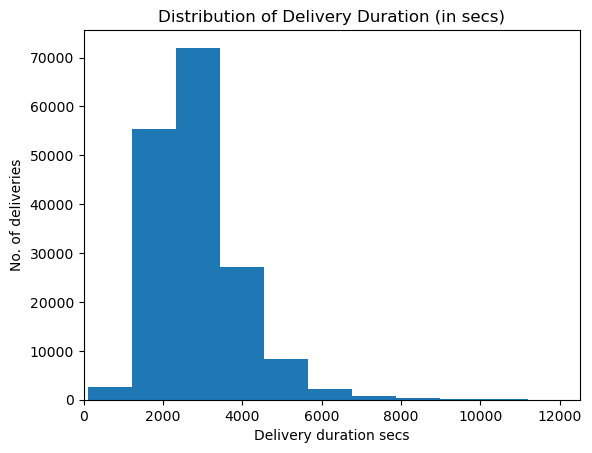

In [60]:
#EXPLORATORY DATA ANALYSIS

plt.hist(df_train['delivery_duration'],bins = 300)
plt.title('Distribution of Delivery Duration (in secs)')
plt.xlabel('Delivery duration secs')
plt.ylabel('No. of deliveries')
plt.xlim(0,12500)
plt.show()

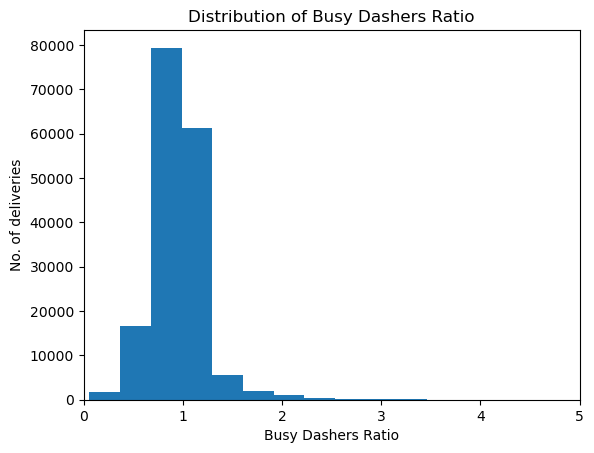

In [61]:
plt.hist(df_train['busy_dashers_ratio'],bins = 100)
plt.title('Distribution of Busy Dashers Ratio')
plt.xlabel('Busy Dashers Ratio')
plt.ylabel('No. of deliveries')
plt.xlim(0,5)
plt.show()

Text(0.5, 1.0, 'Average Item Price Vs. Delivery Duration')

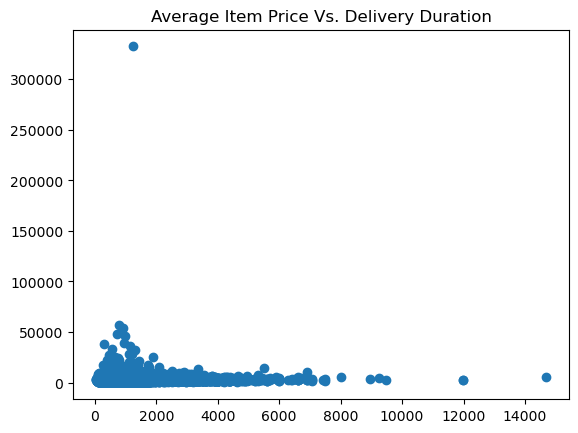

In [63]:
plt.scatter(df_train['avg_item_price'],df_train['delivery_duration'])
plt.title('Average Item Price Vs. Delivery Duration')

Text(0, 0.5, 'delivery_duration (in_secs)')

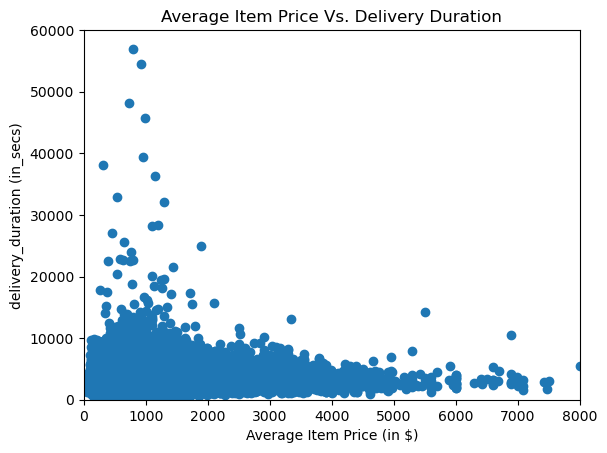

In [67]:
plt.scatter(df_train['avg_item_price'],df_train['delivery_duration'])
plt.title('Average Item Price Vs. Delivery Duration')
plt.xlim(0,8000)
plt.ylim(0,60000)
plt.xlabel('Average Item Price (in $)')
plt.ylabel('delivery_duration (in_secs)')

Text(0, 0.5, 'delivery_duration (in_secs)')

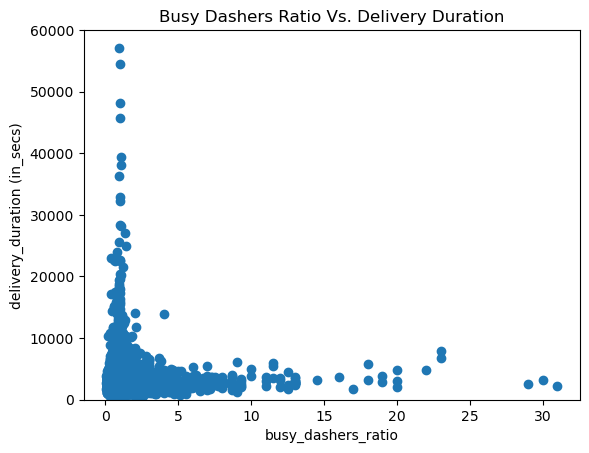

In [68]:
plt.scatter(df_train['busy_dashers_ratio'],df_train['delivery_duration'])
plt.title('Busy Dashers Ratio Vs. Delivery Duration')
plt.ylim(0,60000)
plt.xlabel('busy_dashers_ratio')
plt.ylabel('delivery_duration (in_secs)')

Text(0, 0.5, 'delivery_duration (in_secs)')

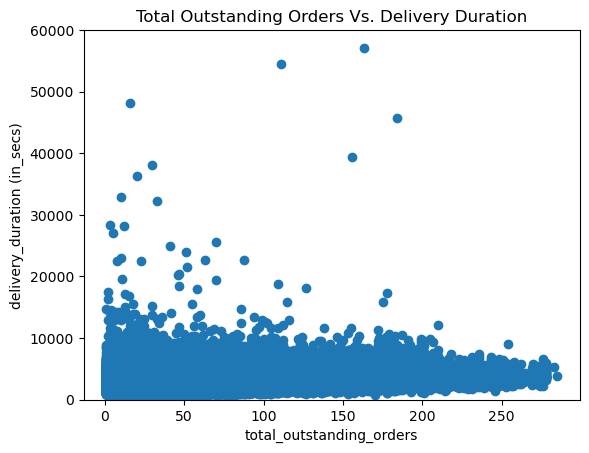

In [69]:
plt.scatter(df_train['total_outstanding_orders'],df_train['delivery_duration'])
plt.title('Total Outstanding Orders Vs. Delivery Duration')
plt.ylim(0,60000)
plt.xlabel('total_outstanding_orders')
plt.ylabel('delivery_duration (in_secs)')

Text(0, 0.5, 'delivery_duration (in_secs)')

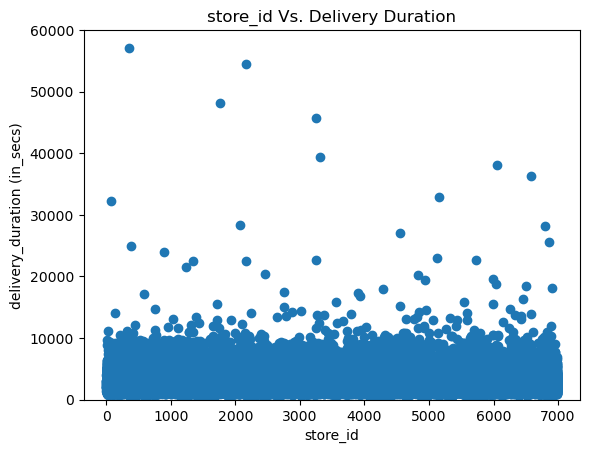

In [70]:
plt.scatter(df_train['store_id'],df_train['delivery_duration'])
plt.title('store_id Vs. Delivery Duration')
plt.ylim(0,60000)
plt.xlabel('store_id')
plt.ylabel('delivery_duration (in_secs)')

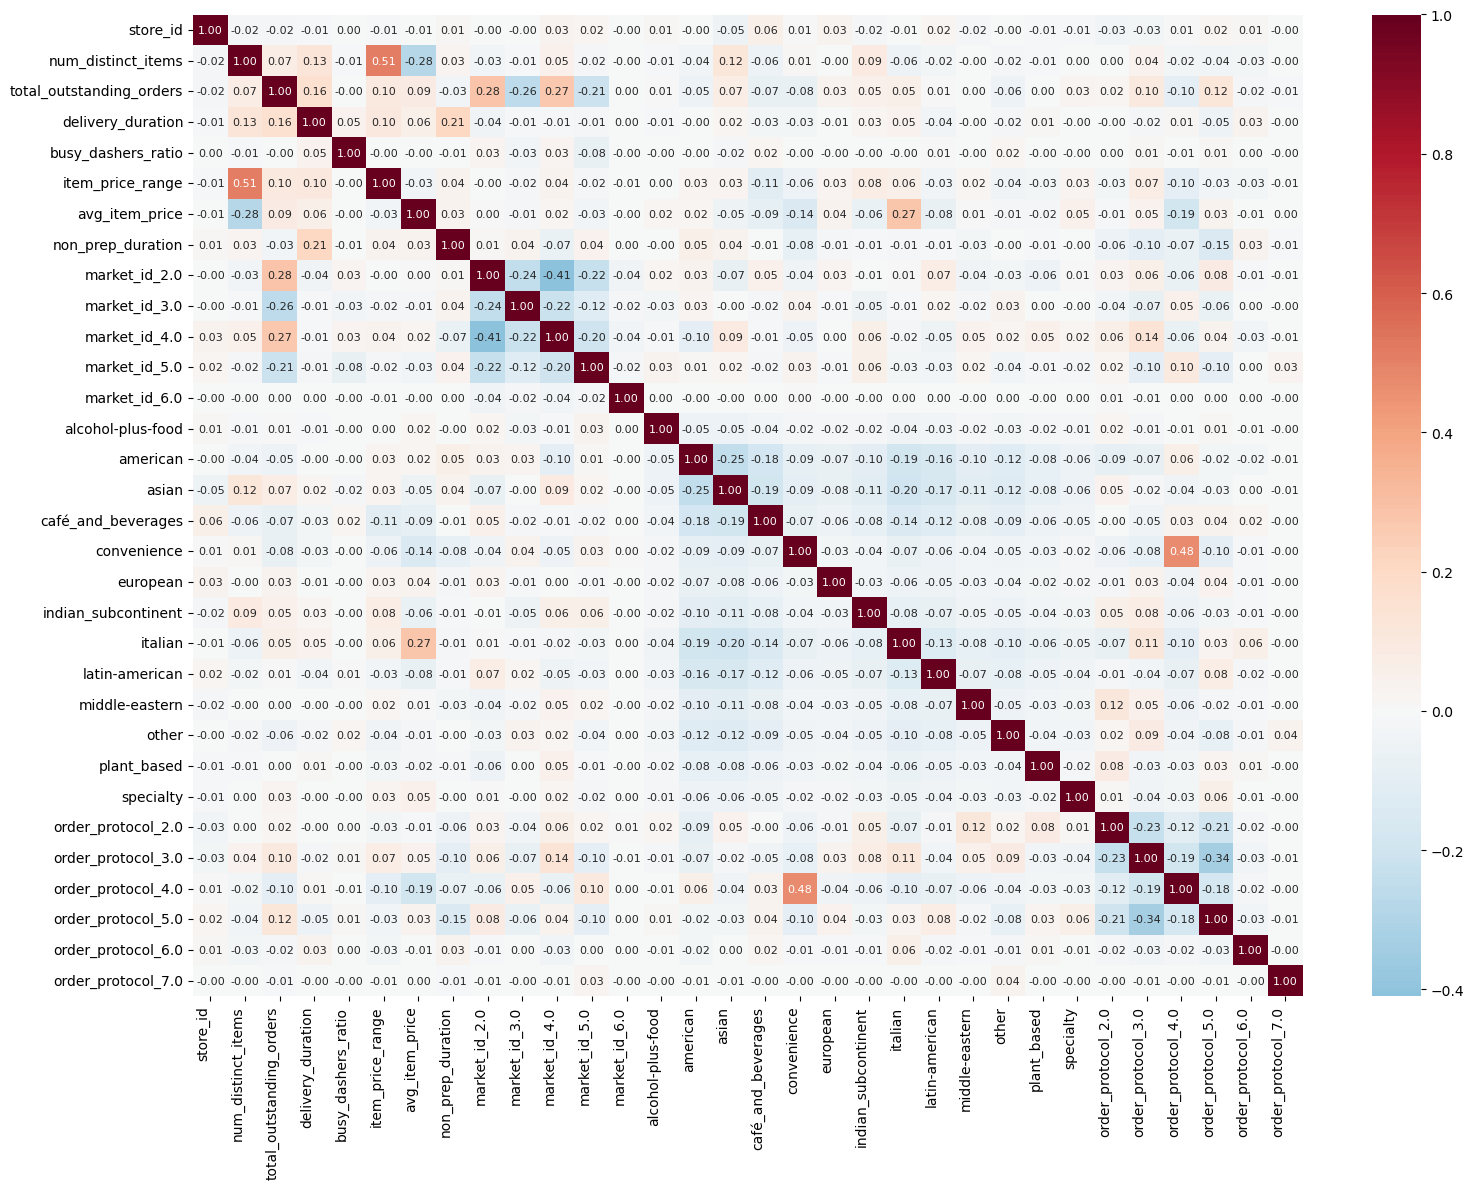

In [71]:
corr_matrix = df_train.corr()
#sns.heatmap(corr_matrix, annot=True, cmap = "coolwarm",square = True, linewidths = 0.5)

# If using seaborn/matplotlib
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            fmt='.2f',
            annot_kws={'size': 8})
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.savefig("correlation_heatmap.pdf", bbox_inches='tight')

plt.show()

In [72]:
df_train = df_train.drop(columns = ['num_distinct_items','convenience'])

In [74]:
#STANDARDIZATION

from sklearn.preprocessing import StandardScaler
features_to_scale = ['total_outstanding_orders','delivery_duration','busy_dashers_ratio','item_price_range','avg_item_price','non_prep_duration']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_train[features_to_scale])
scaled_df = pd.DataFrame(scaled_data, columns=features_to_scale, index=df.index)

other_features = [col for col in df_train.columns if col not in features_to_scale]
df_train = pd.concat([df_train[other_features],scaled_df], axis = 1)

In [75]:
#Model Training and Testing

#Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_train['delivery_duration']
X = df_train.drop('delivery_duration', axis =1)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [77]:
#Model Evaluation

from sklearn.metrics import mean_squared_error, r2_score

print("R^2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

R^2 Score: 0.14726974156466466
MSE: 0.6259474807558482
RMSE: 0.7911684275524701
Intercept: 0.12875508831621832
Coefficients: [ 8.62501324e-07 -4.38197545e-01 -1.44367915e-01 -3.83173910e-01
 -2.01020094e-01 -2.60007776e-01  4.06048409e-02  1.02233115e-01
  1.34423935e-01  1.55442023e-01  9.41754661e-02  2.51531672e-01
  1.88619499e-01  6.51804609e-02  1.25977634e-01  1.12602017e-01
  2.28052784e-01  8.92939663e-02  6.06469129e-02  4.45722425e-04
  2.18261420e-01 -4.82302318e-02  3.20796188e-01  2.31452664e-03
  2.34153872e-01  6.01672625e-02  8.00592965e-02  4.28568947e-02
  2.05313897e-01]


In [78]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [79]:
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
models = { 
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(random_state=42, verbosity=0)
}
results = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Train the model
    print("Training...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    # Store results
    results[name] = {
        'R²': r2,
        'MSE': mse,
        'RMSE': rmse,
    }
    
    # Print results
    print(f"R² Score: {r2:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")


=== Ridge Regression ===
Training...
R² Score: 0.1473
MSE: 0.6259
RMSE: 0.7912

=== Random Forest ===
Training...
R² Score: 0.1477
MSE: 0.6256
RMSE: 0.7910

=== XGBoost ===
Training...
R² Score: 0.0887
MSE: 0.6690
RMSE: 0.8179
